In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("/content/sample_data/train.csv")

In [15]:
# prompt: print the df

df


,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [16]:
# prompt: check for duplicate rows and null values

# Check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
print(duplicate_rows_df)


# Check for null values
print("Number of null values in each column:\n", df.isnull().sum())


Number of duplicate rows:  (0, 9)
Empty DataFrame
Columns: [record_ID, week, store_id, sku_id, total_price, base_price, is_featured_sku, is_display_sku, units_sold]
Index: []
Number of null values in each column:
 record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [17]:
# prompt: delete the null value

import pandas as pd
df=pd.read_csv("/content/sample_data/train.csv")

df

# Check for duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
print(duplicate_rows_df)

# Check for null values
print("Number of null values in each column:\n", df.isnull().sum())

# Delete rows with null values
df = df.dropna()

# Verify that null values have been removed
print("\nNumber of null values in each column after removing null values:\n", df.isnull().sum())

Number of duplicate rows:  (0, 9)
Empty DataFrame
Columns: [record_ID, week, store_id, sku_id, total_price, base_price, is_featured_sku, is_display_sku, units_sold]
Index: []
Number of null values in each column:
 record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

Number of null values in each column after removing null values:
 record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


In [18]:
df[['day', 'month', 'year']] = df['week'].str.split('/', expand=True)


In [19]:
df.describe()
df.drop('record_ID',axis=1,inplace=True)
df.drop('week',axis=1,inplace=True)

df.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,8091,217390,141.0750,141.0750,0,0,52,17,01,11


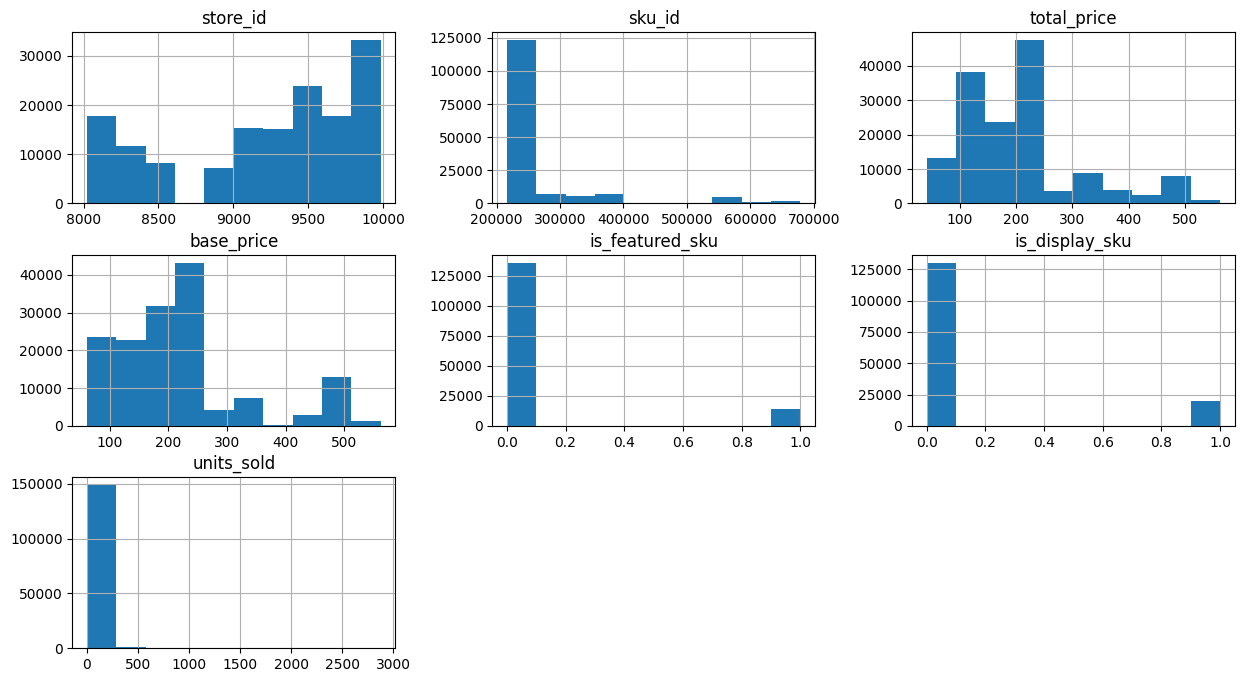

In [20]:
df.hist(figsize= (15,8))
plt.show()

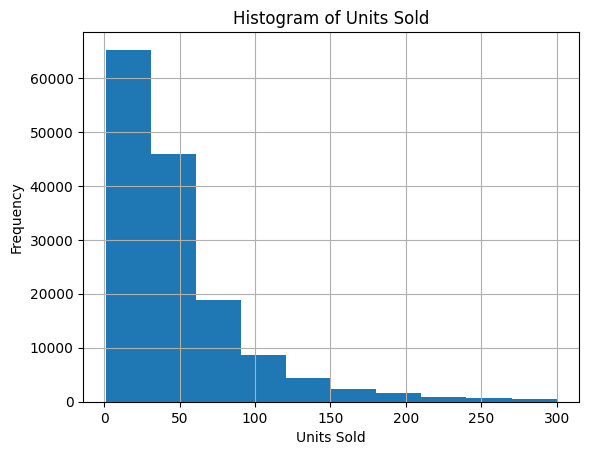

In [21]:
df = df[(df['units_sold'] >= 0) & (df['units_sold'] <= 300)]
df['units_sold'].hist(bins=10)
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.title("Histogram of Units Sold")
plt.show()


In [22]:
unique_store_ids = df['store_id'].nunique()  # Number of unique store_ids
unique_sku_ids = df['sku_id'].nunique()      # Number of unique sku_ids
print(f"Number of unique store IDs: {unique_store_ids}")
print(f"Number of unique SKU IDs: {unique_sku_ids}")

Number of unique store IDs: 76
Number of unique SKU IDs: 28


In [23]:
# One-hot encoding 'store_id' and 'sku_id'
df_encoded = pd.get_dummies(df, columns=['store_id', 'sku_id'], prefix=['store', 'sku'])

# Now df_encoded contains the one-hot encoded columns, no need to drop store_id or sku_id manually
df = df_encoded  # Update df to use the encoded version

# Print the first few rows to verify
print(df.head())


   total_price  base_price  is_featured_sku  is_display_sku  units_sold day  \
0      99.0375    111.8625                0               0          20  17   
1      99.0375     99.0375                0               0          28  17   
2     133.9500    133.9500                0               0          19  17   
3     133.9500    133.9500                0               0          44  17   
4     141.0750    141.0750                0               0          52  17   

  month year  store_8023  store_8058  ...  sku_320485  sku_327492  sku_378934  \
0    01   11       False       False  ...       False       False       False   
1    01   11       False       False  ...       False       False       False   
2    01   11       False       False  ...       False       False       False   
3    01   11       False       False  ...       False       False       False   
4    01   11       False       False  ...       False       False       False   

   sku_398721  sku_545621  sku_546789 

In [24]:
print(df_encoded.head())


   total_price  base_price  is_featured_sku  is_display_sku  units_sold day  \
0      99.0375    111.8625                0               0          20  17   
1      99.0375     99.0375                0               0          28  17   
2     133.9500    133.9500                0               0          19  17   
3     133.9500    133.9500                0               0          44  17   
4     141.0750    141.0750                0               0          52  17   

  month year  store_8023  store_8058  ...  sku_320485  sku_327492  sku_378934  \
0    01   11       False       False  ...       False       False       False   
1    01   11       False       False  ...       False       False       False   
2    01   11       False       False  ...       False       False       False   
3    01   11       False       False  ...       False       False       False   
4    01   11       False       False  ...       False       False       False   

   sku_398721  sku_545621  sku_546789 

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = df.drop(columns=['units_sold'])
y = df['units_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=RandomForestRegressor(n_jobs=-1, random_state=42)

# Fitting the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Model Evaluation: Mean Absolute Error and R^2
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R^2: {r2}')
model.score(X_test, y_test)

Mean Absolute Error: 11.510383543240975
R^2: 0.8217512958433908


0.8217512958433908

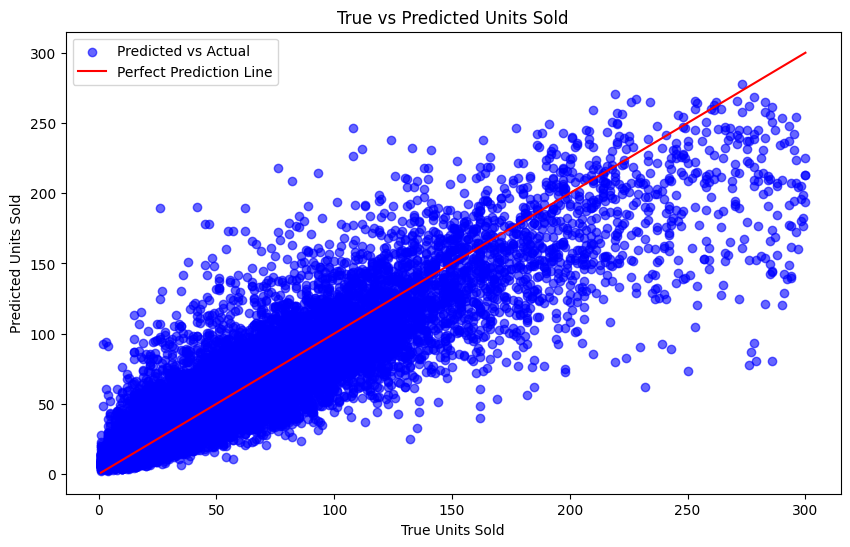

In [31]:
import matplotlib.pyplot as plt

# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Plot the line of perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('True Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('True vs Predicted Units Sold')
plt.legend()

# Show plot
plt.show()
